<a href="https://colab.research.google.com/github/drhoffma/HarperIDEAShopCVCC/blob/main/lessons/04_Contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/drhoffma/HarperIDEAShopCVCC/blob/main/colab_template/header_image.png?raw=true)

# Welcome to **Harper College's IDEAShop** curriculum!

**Course Title:** *Computer Vision, Cameras, & Code*

**Quick Links:** [Homepage](https://tinyurl.com/harpercv-home) | [Syllabus](https://tinyurl.com/harpercv-syllabus) | [Blackboard](#) | [Instructor](https://davidrhoffman.net)

***Terms of use:*** *This course is public domain. If you'd like to use content from this course, please request consent by [contacting Harper College MakerSpace](https://www.harpercollege.edu/maker/contact/index.php).*

---

# Contours

In [1]:
# download yesterday's ping pong ball range filter image
! wget https://github.com/drhoffma/HarperIDEAShopCVCC/raw/main/lessons/images/thresh.png

--2021-07-28 14:25:00--  https://github.com/drhoffma/HarperIDEAShopCVCC/raw/main/lessons/images/thresh.png
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/drhoffma/HarperIDEAShopCVCC/main/lessons/images/thresh.png [following]
--2021-07-28 14:25:00--  https://raw.githubusercontent.com/drhoffma/HarperIDEAShopCVCC/main/lessons/images/thresh.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2427 (2.4K) [image/png]
Saving to: ‘thresh.png’

thresh.png          100%[===================>]   2.37K  --.-KB/s    in 0s      

2021-07-28 14:25:01 (15.7 MB/s) - ‘thresh.png’ saved [2427/2427]



## Finding Contours

In [24]:
# code playground
import cv2
import imutils
from google.colab.patches import cv2_imshow

# load the thresholded image and convert to grayscale
thresh = cv2.imread("thresh.png")
image = thresh.copy()
gray = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

# find contours
cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


## Looping over Contours

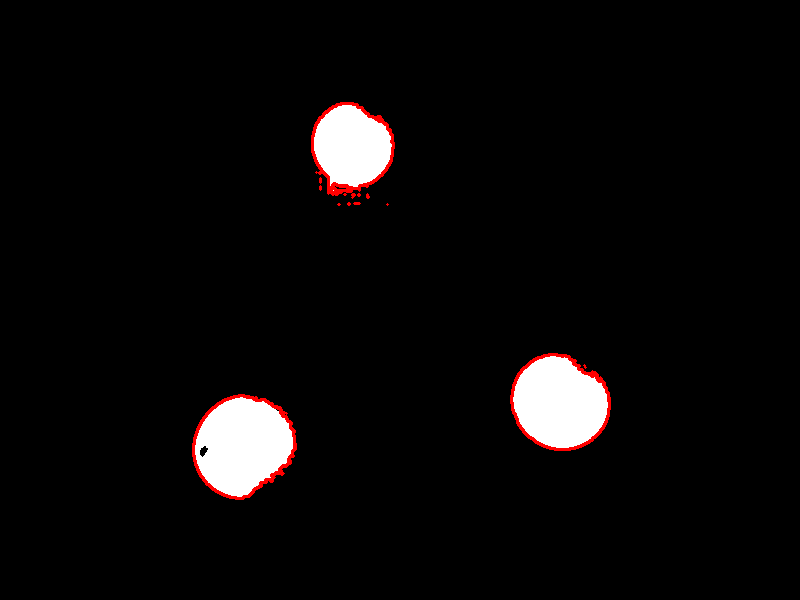

In [25]:
# code playground

# loop over the contours
for c in cnts:
    # draw the contour
    cv2.drawContours(thresh, [c], -1, (0, 0, 255), 2)

# or do it in one fell swoop
#cv2.drawContours(thresh, cnts, -1, (0, 0, 255), 2)

cv2_imshow(thresh)

## Counting Contours

In [17]:
# code playground

print("I found {} contours".format(len(cnts)))

I found 22 contours


## Extracting ROIs

Contour 1 has area 7661.5 pixels


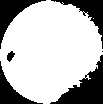

Contour 5 has area 7034.0 pixels


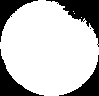

Contour 21 has area 5259.5 pixels


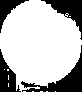

In [23]:
# code playground

# loop over the contours
for i, c in enumerate(cnts):
    # print the contour area
    area = cv2.contourArea(c)
    

    # filter on larger areas
    if area > 5000:
      print("Contour {} has area {} pixels".format(str(i), str(area)))
      # grab the bounding rectangle
      x1, y1, w, h = cv2.boundingRect(c)

      # determine y2 and x2
      y2 = y1 + h
      x2 = x1 + w

      # extract the ROI via NumPy array slicing
      roi = image[y1:y2, x1:x2]

      cv2_imshow(roi)

## Morphological Operations

### Erosion

In [ ]:

# code playground

eroded = cv2.erode(image.copy(), None, iterations=2)
t2 = time.time()
cv2_imshow(eroded)

### Dilation

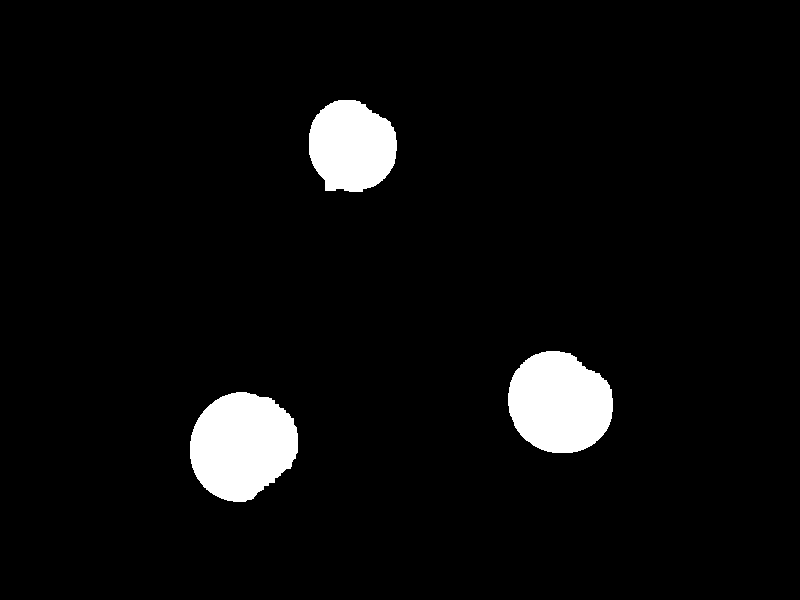

In [45]:
# code playground

dilated = cv2.dilate(eroded, None, iterations=5)
cv2_imshow(dilated)